#### Exploratory Analysis

required libraries

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Define the tickers and time range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-10-31'


# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Only keep the 'Close' prices for simplicity
data_df = data['Close']


[*********************100%***********************]  3 of 3 completed


In [10]:
# Display the first few rows of the data
print(data.head())

Price                      Adj Close                             Close  \
Ticker                           BND         SPY       TSLA        BND   
Date                                                                     
2015-01-02 00:00:00+00:00  63.358757  173.173767  14.620667  82.650002   
2015-01-05 00:00:00+00:00  63.542709  170.046295  14.006000  82.889999   
2015-01-06 00:00:00+00:00  63.726685  168.444656  14.085333  83.129997   
2015-01-07 00:00:00+00:00  63.765018  170.543671  14.063333  83.180000   
2015-01-08 00:00:00+00:00  63.665413  173.569977  14.041333  83.050003   

Price                                                  High              \
Ticker                            SPY       TSLA        BND         SPY   
Date                                                                      
2015-01-02 00:00:00+00:00  205.429993  14.620667  82.690002  206.880005   
2015-01-05 00:00:00+00:00  201.720001  14.006000  82.919998  204.369995   
2015-01-06 00:00:00+00:00  199.8

In [13]:
# Check for missing values
missing_values = data_df.isnull().sum()

# Print missing values per column
print("\nMissing values per column:")
if missing_values.sum() == 0:
    print("No missing values in any column.")
else:
    print(missing_values)



Missing values per column:
No missing values in any column.


In [14]:
# Check data types and basic statistics
print("\nData Types:")
print(data_df.dtypes)

print("\nBasic Statistics:")
print(data_df.describe())


Data Types:
Ticker
BND     float64
SPY     float64
TSLA    float64
dtype: object

Basic Statistics:
Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      80.316039   330.623634   111.438965
std        5.097592   103.324179   110.120450
min       68.040001   182.860001     9.578000
25%       76.379997   242.130001    17.066167
50%       81.410004   298.089996    25.043000
75%       84.010002   416.212502   216.865002
max       89.480003   584.590027   409.970001


In [15]:
scaled_data = (data_df - data_df.min()) / (data_df.max() - data_df.min())

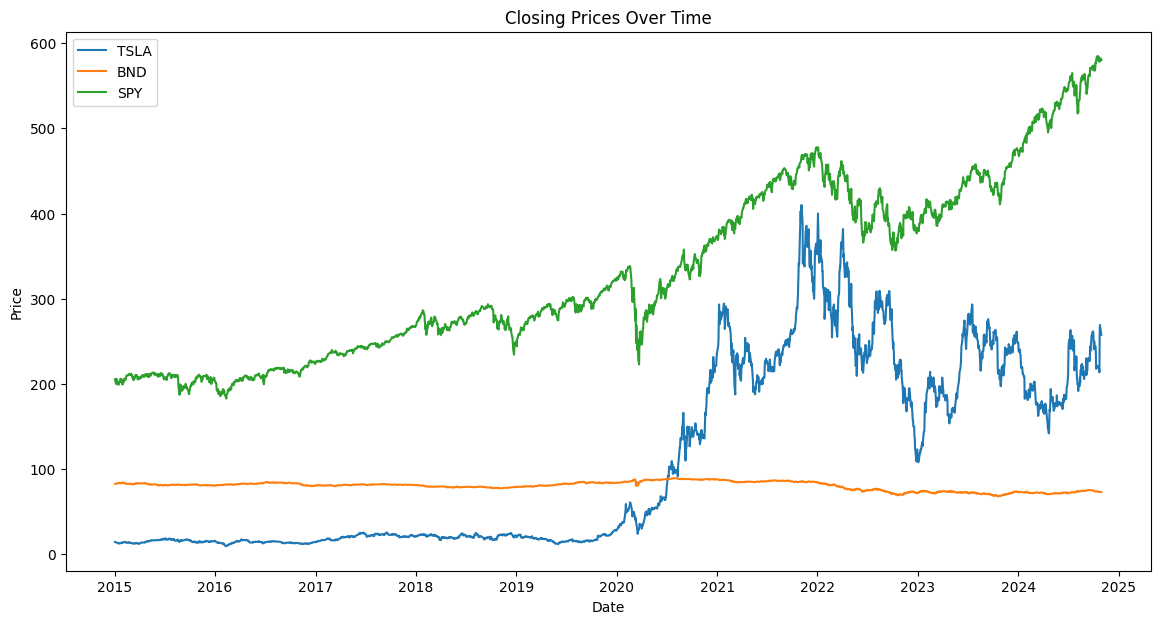

In [17]:
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data_df[ticker], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
daily_returns = data_df.pct_change().dropna()

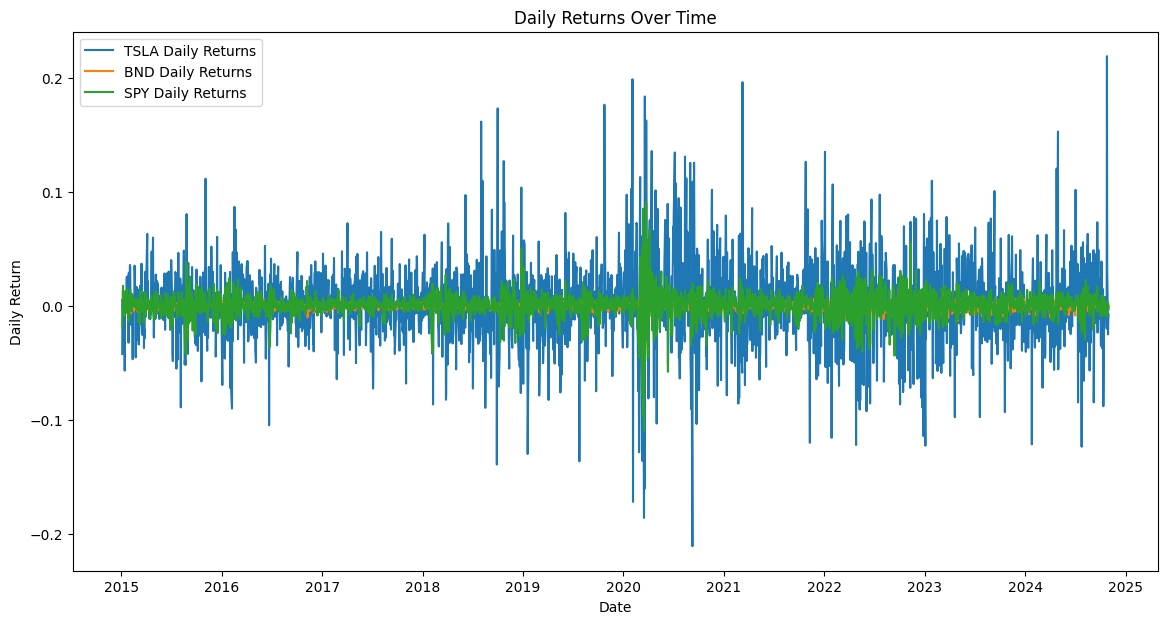

In [19]:
# Plot daily percentage change to observe volatility
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=f'{ticker} Daily Returns')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()